In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from itertools import product
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import channel
from pyJHTDB import libJHTDB

In [2]:
Ny = channel['ny']
ynodes = channel['ynodes']
Ly = channel['ly']
Nx = channel['nx']
xnodes = channel['xnodes']
Lx = channel['lx']
Nz = channel['nz']
znodes = channel['znodes']
Lz = channel['lz']
nlines = 32
ntimes = 32

In [3]:
x = np.zeros((nlines,Ny,3),dtype=np.float32)

indx = np.random.choice(np.array(range(Nx*Nz)),size=nlines)
time = np.random.choice(channel['time'], size = ntimes)

for i in range(indx.shape[0]):
    iz = indx[i] // Nx
    ix = indx[i] % Nx 
    x0 = xnodes[ix]#plane[indx[i],0]
    z0 = znodes[iz]#plane[indx[i],1]
    x[i,:,0] = x0
    x[i,:,2] = z0
    x[i,:,1] = ynodes[:]
    

In [4]:
lJHTDB = libJHTDB()
lJHTDB.initialize()
u = []
for t in time:
    u.append(lJHTDB.getData(t,x,getFunction = 'getVelocity',
                            data_set = channel['name']))
lJHTDB.finalize()
u = np.array(u).reshape(nlines*ntimes, x.shape[1], -1)

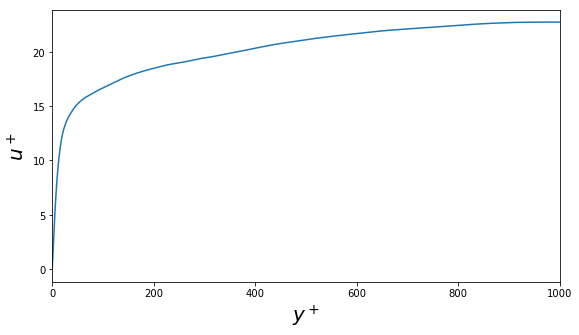

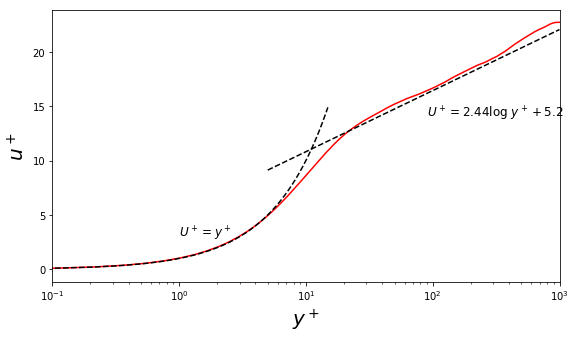

In [5]:
uAvg = np.average(u,axis=0)
uA = np.zeros(channel['ny'],dtype='float32')
uA[:] = uAvg[:,0]
us = 4.9968/100.

fig = plt.figure(figsize = (20, 5))
axes = fig.add_subplot(121)
axes.set_xlim([0,1000])
axes.set_xlabel("$y^+$",fontsize=20)
axes.set_ylabel("$u^+$",fontsize=20)
axes.plot((channel['ynodes']+1)*1000,uA/us)

fig2 = plt.figure(figsize = (20, 5))
bxes = fig2.add_subplot(122)
bxes.set_xscale('log')
bxes.set_xlim([1./10,1000])
bxes.plot((channel['ynodes']+1)*1000,uA/us,'r')

yl = np.arange(0,15,0.1)
bxes.plot(yl,yl,'k--')

def loglaw(yp):
    return 2.44*np.log(yp)+5.2

yl = np.arange(5,1000)
ulog = np.apply_along_axis(loglaw,0,yl)
bxes.set_xlabel("$y^+$",fontsize=20)
bxes.set_ylabel("$u^+$",fontsize=20)
bxes.text(90, 14, r'$U^+ = 2.44 \log \ y^+ + 5.2$', fontsize=12)
bxes.text(1, 3, r'$U^+ = y^+$', fontsize=12)

bxes.plot(yl,ulog,'k--')

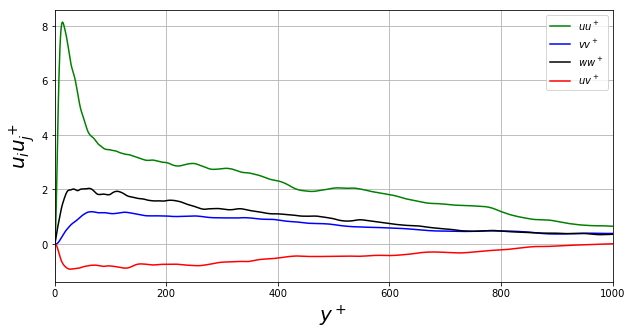

In [6]:
URms = np.zeros(channel['ny'],dtype='float32')
VRms = np.zeros(channel['ny'],dtype='float32')
WRms = np.zeros(channel['ny'],dtype='float32')

uRms = np.average((u-uAvg)**2,axis = 0)
URms[:] = uRms[:,0]
VRms[:] = uRms[:,1]
WRms[:] = uRms[:,2]

Um = u[:,:,0]-uAvg[:,0]
Vm = u[:,:,1]-uAvg[:,1]

UVAvg = np.average( Um*Vm,axis=0 )

#URms = np.sqrt(URms)
URms = URms/(us**2)
VRms = VRms/(us**2)
WRms = WRms/(us**2)
UVAvg = UVAvg/(us**2)

fig = plt.figure(figsize = (10, 5))
axes = fig.add_subplot(111)
axes.set_xlim([0,1000])
axes.set_xlabel("$y^+$",fontsize=20)
axes.set_ylabel("$u_i u_j^+$",fontsize=20)
axes.grid()
axes.plot((channel['ynodes']+1)*1000,URms,'g',label=r'$uu^+$')
axes.plot((channel['ynodes']+1)*1000,VRms,'b',label=r'$vv^+$')
axes.plot((channel['ynodes']+1)*1000,WRms,'k',label=r'$ww^+$')
axes.plot((channel['ynodes']+1)*1000,UVAvg,'r',label=r'$uv^+$')
axes.legend()
